# DATATHON

### Mediante un $set$ de datos con las siguientes columnas:

- ID: identificador del registro de orden (valor entero).
- Warehouse_block: Almacén de distribución de donde salió la orden (A a F).
- Mode_of_Shipment: Medio de transporte (Flight, Road, Ship).
- Customer_care_calls: Número de llamadas a atención al cliente que hubo por esa orden. (valores enteros del 2 al 7)
- Customer_rating: Puntaje del cliente (valores enteros 1 al 5).
- Cost_of_the_Product: Costo del producto (valor numérico entero de 96 a 310).
- Prior_purchases: Número de compras previas realizadas por el cliente (valor numérico entero de 2 a 10).
- Product_importance: Nivel de importancia del producto (low, medium, high).
- Gender: Género del comprador (F, M).
- Discount_offered: Porcentaje de descuento ofrecido por esa compra (valor numérico entero de 1 a 65):
- Weight_in_gms: Peso del paquete de la orden, en gramos (valor numérico entero de 1001 a 7846).
- Reached.on.Time_Y.N: Información sobre la llegada del paquete a destino (1 si llegó a tiempo, 0 si no llegó a tiempo).

### Intentar generar un modelo con **SKLEARN**, el cual prediga lo máximo posible  si un paquete llegó a tiempo o no.

#### Para este caso se usa 4 librerías:
1. Pandas (Procesamiento de Tablas)
2. Matplotlib (Generación de gráficas)
3. seaborn (Mejoramiento gráfico de Matplotlib)
4. sklearn (Análisis estádistico y Análisis de Machine Learning)

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Explicando con más detalle lo importado a este **Notebook**:

### **Pipeline**: Nos ayuda a generar un proceso que debe seguir nuestro algoritmo de forma fácil.

### **PCA (Principal Component Analysis)**: Dado una matriz de covarianza obtenido del set de datos mediante autovalores y autovectores, es encontrar una nueva matriz covariante con valores diferentes a cero únicamente en la traza. con esto se encuentran autovectores ortogonales los cuales nos ayuda a transformar nuestros datos. Esto con el objetivo de encontrar nuevas dimensiones, las cuales podrán contener más información que con la matriz de covarianza original. Dado que alguna dimensión podrá contener más información, esto nos ayuda reducir la dimensionalidad, intentando que no se pierda la mayor de informacioón posible.

### **ColumnTransformer**: Dado el caso que se desea operar sobre ciertos columnas y no sobre todas como pasa con el pipeline O también si se desea hacer procesos paralelamente es util usar este objeto para hacer estos procesos.
### **GridSearchCV (Búsqueda exhaustiva en cuadrícula)**: La búsqueda de cuadrícula proporcionada por GridSearchCVgenera exhaustivamente candidatos a partir de una cuadrícula de valores de parámetros especificados con el param_grid parámetro.

### **StandardScaler**: Estandariza una columna o set de datos suponiendo una distrubución normal de los datos dado por la fórmula:
$$x'_{i}=\frac{x_{i}-\mu}{\sigma},$$
### siendo $x_{i}$ el valor original y $x_{i}'$ el valor estandarizado. Es de notar que $i$ es el i-ésimo dato de un conjunto de datos de tamaño $N$.
### Donde $\mu$ es la media aritmética y $\sigma$ es la desviación estándar, para este caso denotadas de la siguiente forma: 
$$\mu=\frac{1}{N}\sum_{i=1}^{N}x_{i}$$
$$\sigma²=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu)^2$$
### **OneHotEncoder**:  transforma cada característica categórica con $n$ categorias posibles en $n$ características binarias, siendo una de ellas 1 y todas las demás 0.
### **PolynomialFeatures**: Esta variable mezcla columnas de con un grado polinomial escogido. por ejemplo: sea un set de datos $Y$ con dos columnas $y_{1}$ y $y_{2}$ vamos a generar nuevas columnas con la combinación de las dos. Escogemos el grado de polinomio: $2$ las nuevas columnas del set de datos $Y$ son $1$, $y_{1}$, $y_{2}$, $y_{1}y_{2}$, $y_{1}^2$ y $y_{2}^2$, bajo esta logica notamos que rige desde el teorema multinomial sumado una unidad, es decir:

$$polinomio = (y_{1}+y_{2}+...+y_{p})^M+1$$

$$polinomio = 1+\sum_{i_{1}+i_{2}+...+i_{p}=M}\binom{M}{i_{1}, i_{2},...,i_{p}}\prod_{1<t<p}x_{t}^{k_{t}}$$
### siendo $p$ la cantidad de columnas, el grado del polinomio $M$, $i_{t}$las combinaciones de enteros no negativos posibles menores a $M$.
### **confusion_matrix**: Genera una matriz de confusión minimo con 4 elementos: Verdadero Positivo, Falso Positivo, Falso Negativo y Verdadero Negativo.
### **ConfusionMatrixDisplay**: Genera un mapa de calor minimo con 4 píxeles de la matriz de confusión.
### **classification_report**: Genera una tabla en pantalla con ciertas relaciones estadisticas importantes a la hora de generar un modelo de clasificación. Dichas estadisticas importantes son:
1. Presición: Denota la fracción de instancias relevantes entre las instancias recuperadas es decir:

$$presición=\frac{verdadero\_positivo}{verdadero\_positivo+falso\_positivo}$$

2. Recuperación: Denota la fraccipon de instancias relevantes que se recuperaron, es decir:

$$recuperacion=\frac{verdadero\_positivo}{verdadero\_positivo+falso\_negativo}$$

3. puntuación F: Denota la media armonica de la recuperación y la precisión, es decir:

$$F=2*\frac{presicion*recuperacion}{presicion+recuperacion}$$

3. Accuracy: muestra la presición total entre la certeza de obtener buenos datos de verdaderos positivos y verdaderos negativos teniendo en cuenta el error de obtener falsos positivo y falsos negativos, es decir:

$$Accuracy = \frac{verdadero\_positivo+verdadero\_negativo}{verdadero\_positivo+verdadero\_negativo+falso\_positivo+falso\_negativo}$$

Si $falso\_positivo$ y $falso\_negativo$ son igual a cero, entonces se tiene que:

$$Accuracy = \frac{verdadero\_positivo+verdadero\_negativo}{verdadero\_positivo+verdadero\_negativo}$$
$$Accuracy = 1$$
### **train_test_split**: Este método puede partir los datos dependiendo un corte posible lo mas uniforme posible.
### **MLPClassifier**: Método de Backpropagation para poder relacionar los datos con unos parametros dados así poder predecir con distintos datos en el futuro.

### $Backpropagation$ es un método el cual mediante datos de entrada se entrena una red neuronal se compara su salida con datos que se esperan que sean los predecidos y luego se va para atrás para calibrar los hiperparámetros. La siguiente imagen es una construcción de una red neuronal.
![alt text](images/backpropagation.jpg)

### Donde cada circunferencia denota una neurona, $w_{ij}$ denota cada peso de cada neurona, $b_{j}$ los bias. Estos dos parámetros anteriores son los que se van calibrando mediante el backpropagation. Cada columna de neuronas es llamada capa oculta. Cada dato de entrada $z_{i}$ a una neurona correspondiente es multiplicada por su peso correspondiente $w_{ij}$ siendo $j$ la $j$-esima neurona y sumandole el parámetro bias, como si fuera una función con tendencia linea. luego de todos, el procedimiento con todos los $z_{i}$ que interactuan con la nuerona, dicho resultado es sumado, dando como resultado la funcion $a_{j}$ como se muestra en la imagen. para finalmente dicha función entrar en una función $h$ llamada función de activación. Dicho mapeo corresponde a:
$$h:\mathbb{R} \to \mathbb{R}$$
### Es decir que convierte el valor $a_{j}$ en un nuevo valor del mismo espacio de los reales, dicho mapeo convierte $a_{j}$ en un nuevo $z_{j}$ que interactuará con la siguiente capa. Tal que la salida última es una mapeo progresivo constante con la función de activación.

### en sklearn existen 4 tipos de funciones de activacion:
### 1. Función identidad: No modifica el valor de $a_{j}$ es decir que la función de identidad es:
$$f(x)=x$$
### 2. Función logistica: Modifica el valor de $a_{j}$ y lo mapea en el espacio $[-1,1]$, está definida de la siguente forma:
$$f(x)=\frac{1}{1+e^{-x}}$$
### 3. Función tangente hiperbólica: Función que mapea también en el espacio $[-1,1]$, está definida de la siguiente forma:
$$f(x)=tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$
### 4. ReLU: FUnción que mapea $a_{j}$ al espacio $[0,\infty]$ definida de la siguente forma:
$$
    f(x)= 
\begin{cases}
    x,& \text{if } x > 0\\
    0,              & \text{para otros casos.}
\end{cases}
$$

### Para la actualización de los parametros $w_{ij}$ y $b_{j}$ que intentan minimizar el error $\epsilon$ correspondiente al error medio cuadrático que puede ser derivado desde el $Likelihood$ tomando que los errores se comportan como una distribución normal, se procede mediante métodos de descenso por gradiente.

### Tenemos en cuenta que para minimizar el error tenemos que actualizar los parámetros y es posible por descenso por gradiente de la siguente forma:
$$\theta_{t+1}= \theta_{t} - \alpha \nabla \epsilon  $$
### siendo $\theta$ la matriz con los hiperparámetros de la red neuronal y $\alpha$ la rata de aprendizaje.
### para mejorar la minimización usaremos el metodo ADAM de descenso por gradiente definido de la siguente forma:
$$m_{t}=0.9m_{t-1}+(1-0.9)\nabla \epsilon$$

$$v_{t}=0.9v_{t-1}+(1-0.999)(\nabla \epsilon)²$$

$$\hat{m}_{t}=\frac{m_{t}}{1-0.9^t}$$

$$\hat{v}_{t}=\frac{v_{t}}{1-0.999^t}$$

$$\theta_{t+1}= \theta_{t} - \frac{\alpha}{\sqrt{\hat{v}_{t}}+\beta} \hat{m}_t  $$

### Siendo $\beta =10^{-8}$

## Subiendo datos de entrenamiento y cantidad de datos
### En este caso subimos los datos de excel, el cual contiene las 12 columnas antes mencionadas mediante el la función pd.read_excel() de pandas y analizamos la cantidad de datos y columnas con el método shape, como se muestra acontinuación:

In [3]:
datos = pd.read_excel("data/E-Commerce_train.xlsx")

In [4]:
datos.shape

(8999, 12)

## MIRANDO COLUMNAS
### con el método columns se puede mirar el nombre de todas las columnas de la siguente forma:

In [5]:
datos.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## Mirando datos nulos
### para enpezar primero nos cercioramos de que no hayan valores nulos mediante la función isna(), luego sumamos todos los valores nulos por cada columna con la función sum() de la siguente forma: 

In [6]:
datos.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## Analizando tipo de dato y cantidad de datos

In [7]:
datos.ID.value_counts()

1       1
6003    1
5997    1
5998    1
5999    1
       ..
2995    1
2994    1
2993    1
2992    1
8999    1
Name: ID, Length: 8999, dtype: int64

In [8]:
datos.Warehouse_block.value_counts() #recordar

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [9]:
datos.Mode_of_Shipment.value_counts()

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [10]:
datos.Customer_care_calls.value_counts()

4    2892
3    2743
5    1820
6     803
2     554
7     187
Name: Customer_care_calls, dtype: int64

In [11]:
datos.Customer_rating.value_counts()


3    1836
1    1823
4    1802
5    1779
2    1759
Name: Customer_rating, dtype: int64

In [12]:
datos.Cost_of_the_Product.value_counts()

245    86
260    85
266    82
254    80
264    78
       ..
96      4
107     4
122     3
125     3
288     3
Name: Cost_of_the_Product, Length: 215, dtype: int64

In [13]:
datos.Prior_purchases.value_counts()

3     3347
2     2239
4     1752
5      863
6      402
10     152
7      126
8      118
Name: Prior_purchases, dtype: int64

In [14]:
datos.Product_importance.value_counts()

low       4308
medium    3858
high       833
Name: Product_importance, dtype: int64

In [15]:
datos.Gender.value_counts()

F    4540
M    4459
Name: Gender, dtype: int64

In [16]:
datos.Weight_in_gms.value_counts()

1005    10
4883     9
4343     9
5783     9
4632     9
        ..
5094     1
2077     1
3817     1
5020     1
5648     1
Name: Weight_in_gms, Length: 3918, dtype: int64

In [17]:
datos.Discount_offered.value_counts()

6     662
2     652
3     643
1     639
10    636
     ... 
65     36
26     36
42     35
25     34
30     34
Name: Discount_offered, Length: 65, dtype: int64

## Transformando Cardinales a ordinales.

In [18]:
#datos.Warehouse_block = categorical_to_ordinal(datos.Warehouse_block)
#datos.Mode_of_Shipment = categorical_to_ordinal(datos.Mode_of_Shipment)
#datos.Product_importance = categorical_to_ordinal(datos.Product_importance)
#datos.Gender = categorical_to_ordinal(datos.Gender)

In [19]:
#datos.Warehouse_block.value_counts()

In [20]:
#datos.Mode_of_Shipment.value_counts()

In [21]:
#datos.Product_importance.value_counts()

In [22]:
#datos.Gender.value_counts()

## Subiendo datos de TEST y conteo

In [23]:
datostest = pd.read_excel("data/E-Commerce_test.xlsx")

In [24]:
datostest.shape

(2000, 11)

In [25]:
datostest.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

## Transformando Cardinales a ordinales.

## comparación de Pairplots

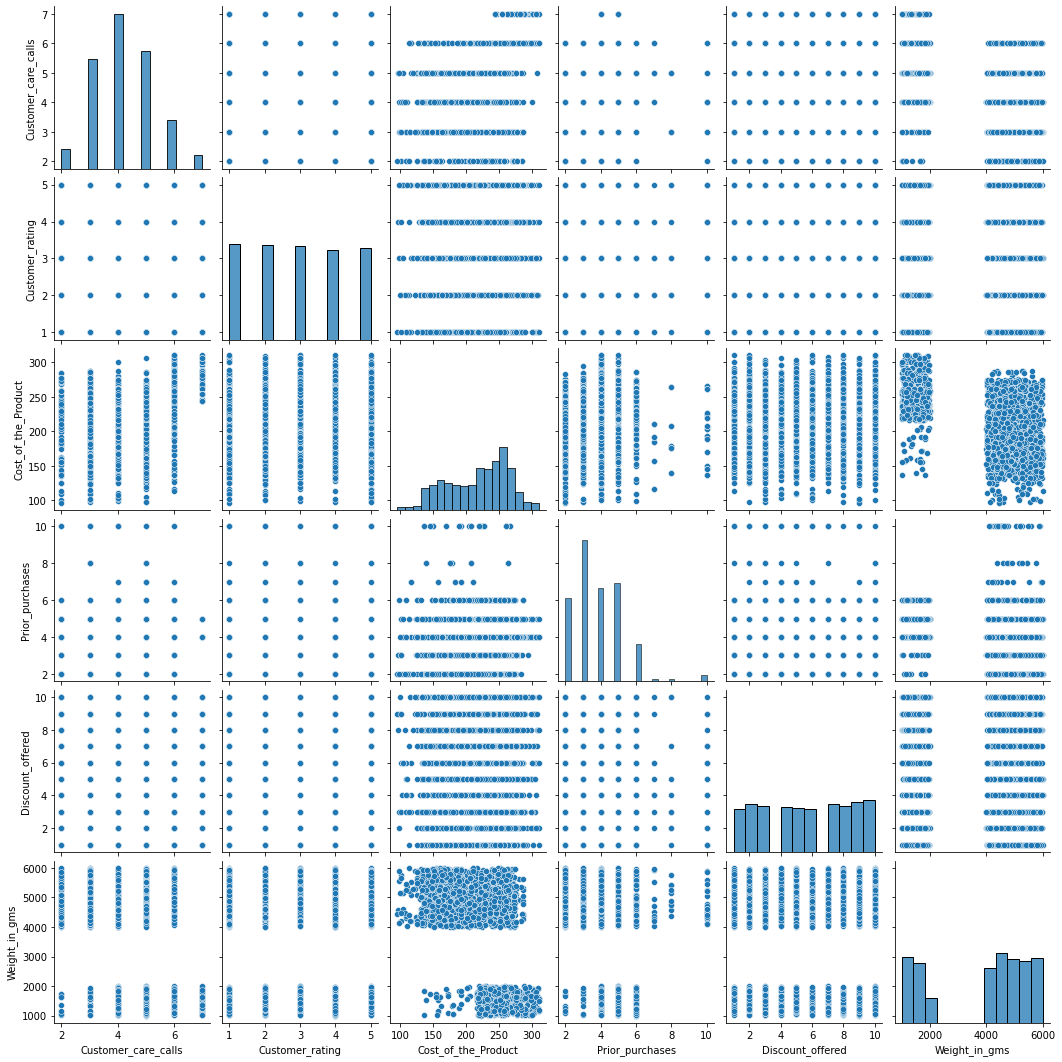

In [26]:
sns.pairplot(datostest.drop(columns = ["ID"]), diag_kind="hist")
plt.savefig('distribucion_bivariada.png')
plt.show()

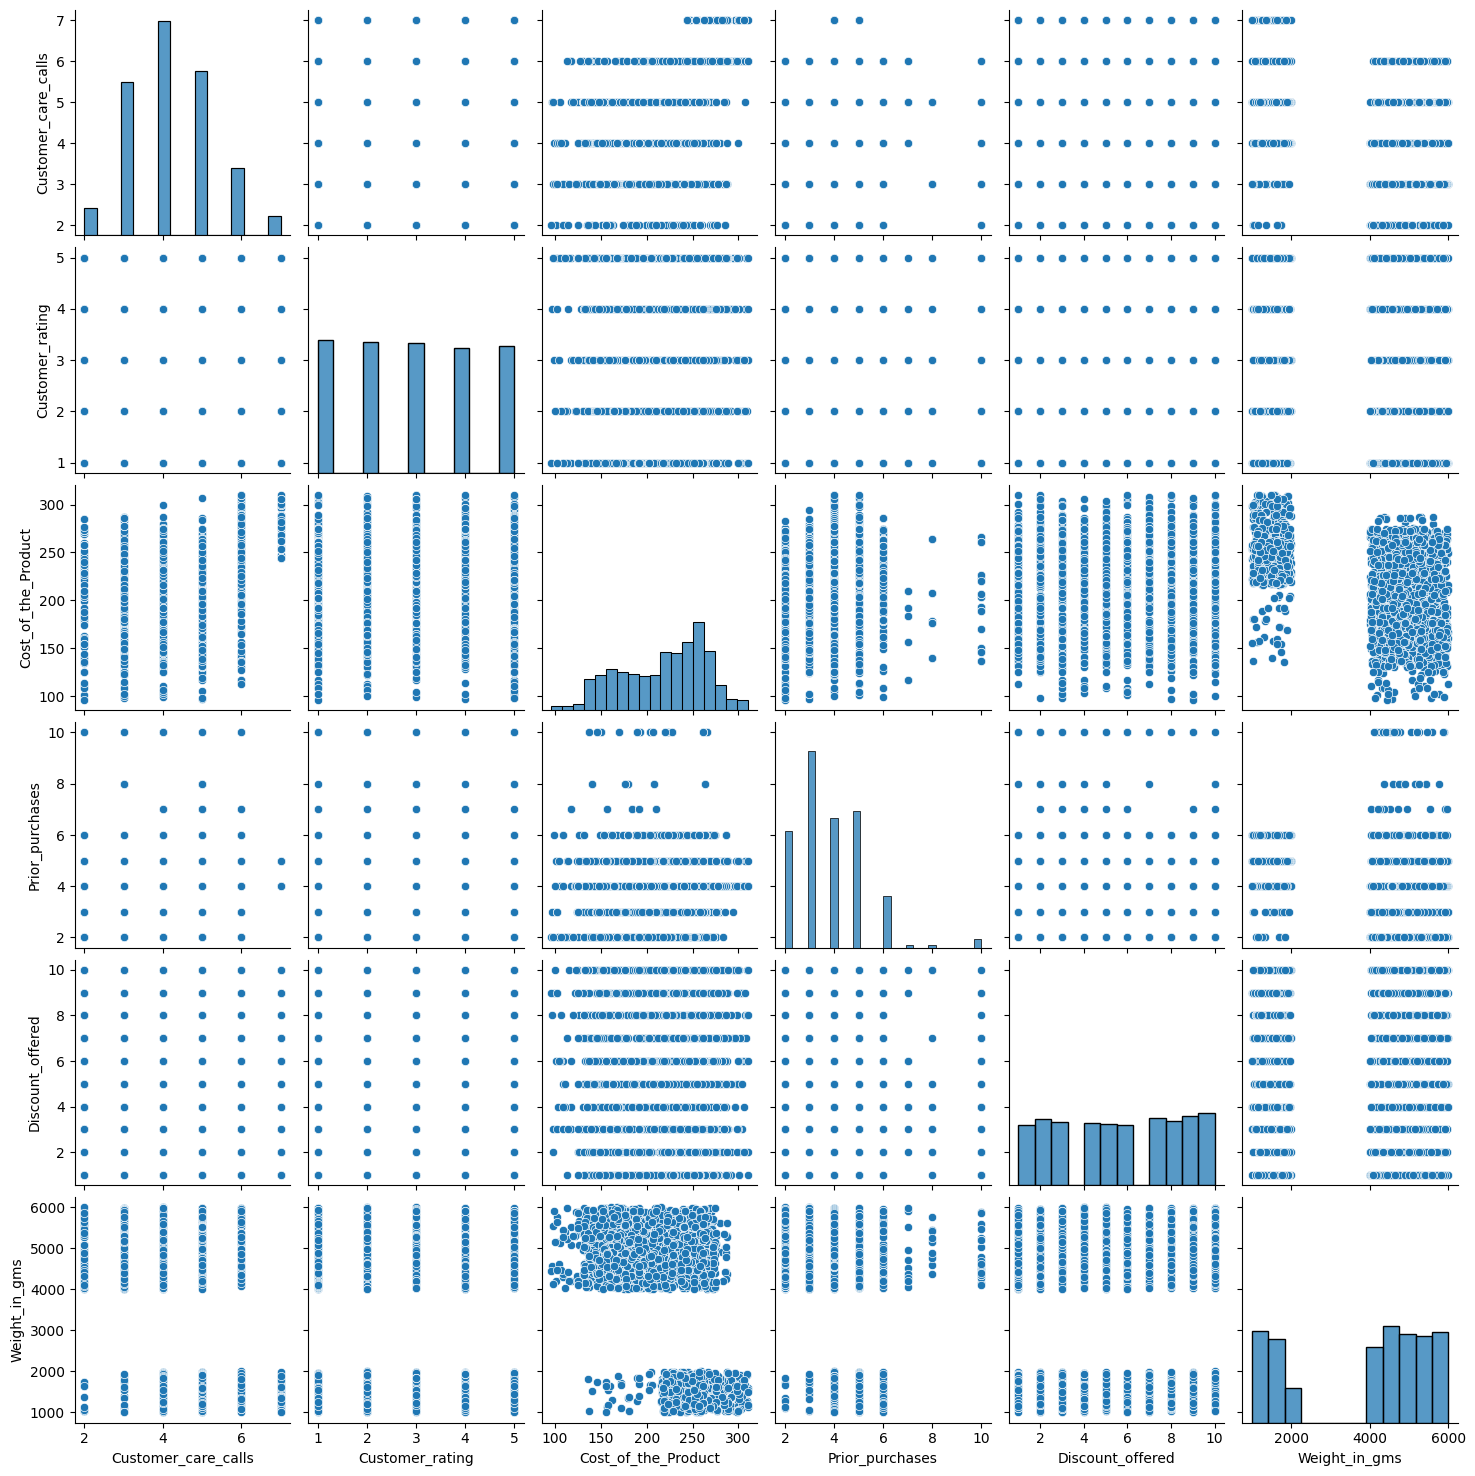

In [27]:
sns.pairplot(datostest.drop(columns = ["ID"]), diag_kind="hist")
plt.savefig('distribucion_bivariada_test.png')
plt.show()

## Cortes en los datos

#### Discount es muy grande

In [28]:
print("train = ", datos.Discount_offered.max())
print("test = ", datostest.Discount_offered.max())

train =  65
test =  10


In [29]:
datos = datos.loc[datos.Discount_offered <= datostest.Discount_offered.max()]

In [30]:
print("train = ", datos.Discount_offered.max(), datos.Discount_offered.min())
print("test = ", datostest.Discount_offered.max(), datostest.Discount_offered.min())

train =  10 1
test =  10 1


In [31]:
datos.shape

(6352, 12)

In [32]:
datostest.shape

(2000, 11)

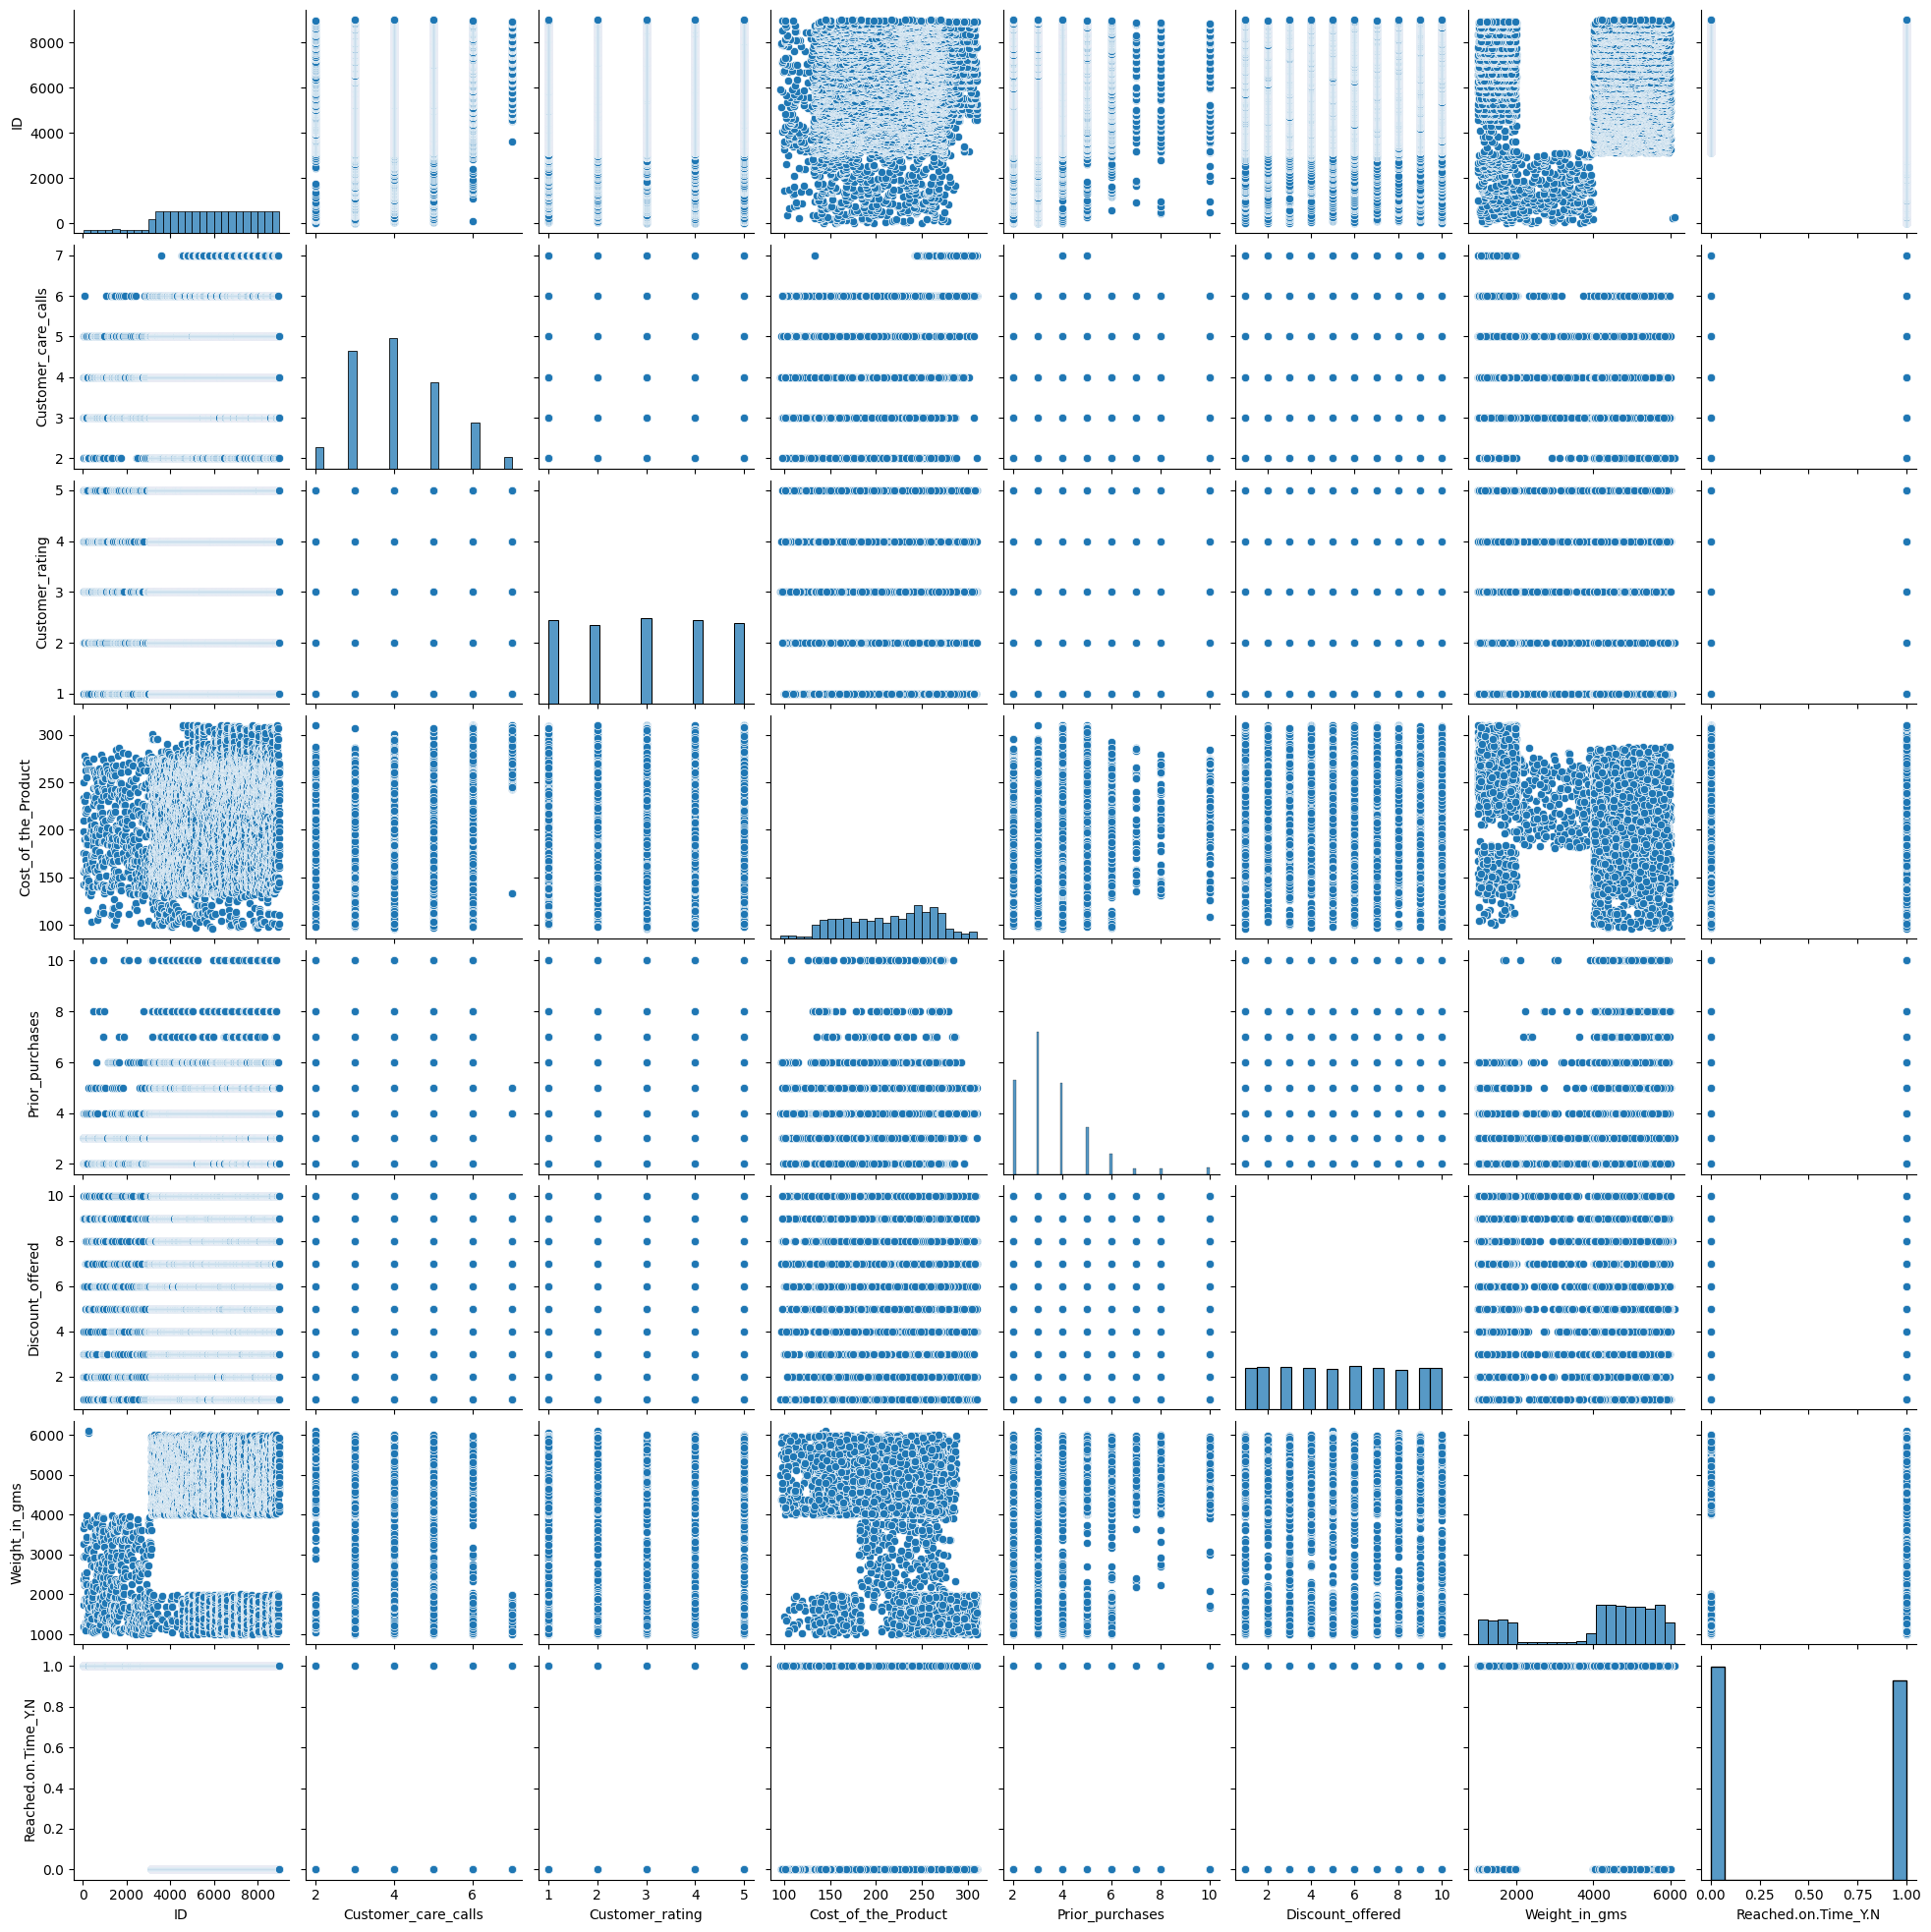

In [33]:
sns.pairplot(datos, diag_kind="hist")
plt.savefig('distribucion_bivariada.png')
plt.show()

## Corte en la mitad de pesos en gramos.

In [34]:
minimo = datostest.loc[datostest.Weight_in_gms <3000].Weight_in_gms.max()

In [35]:
maximo = datostest.loc[datostest.Weight_in_gms >3000].Weight_in_gms.min()

In [36]:
datos = datos.loc[(datos.Weight_in_gms >= maximo) | (datos.Weight_in_gms <= minimo)]

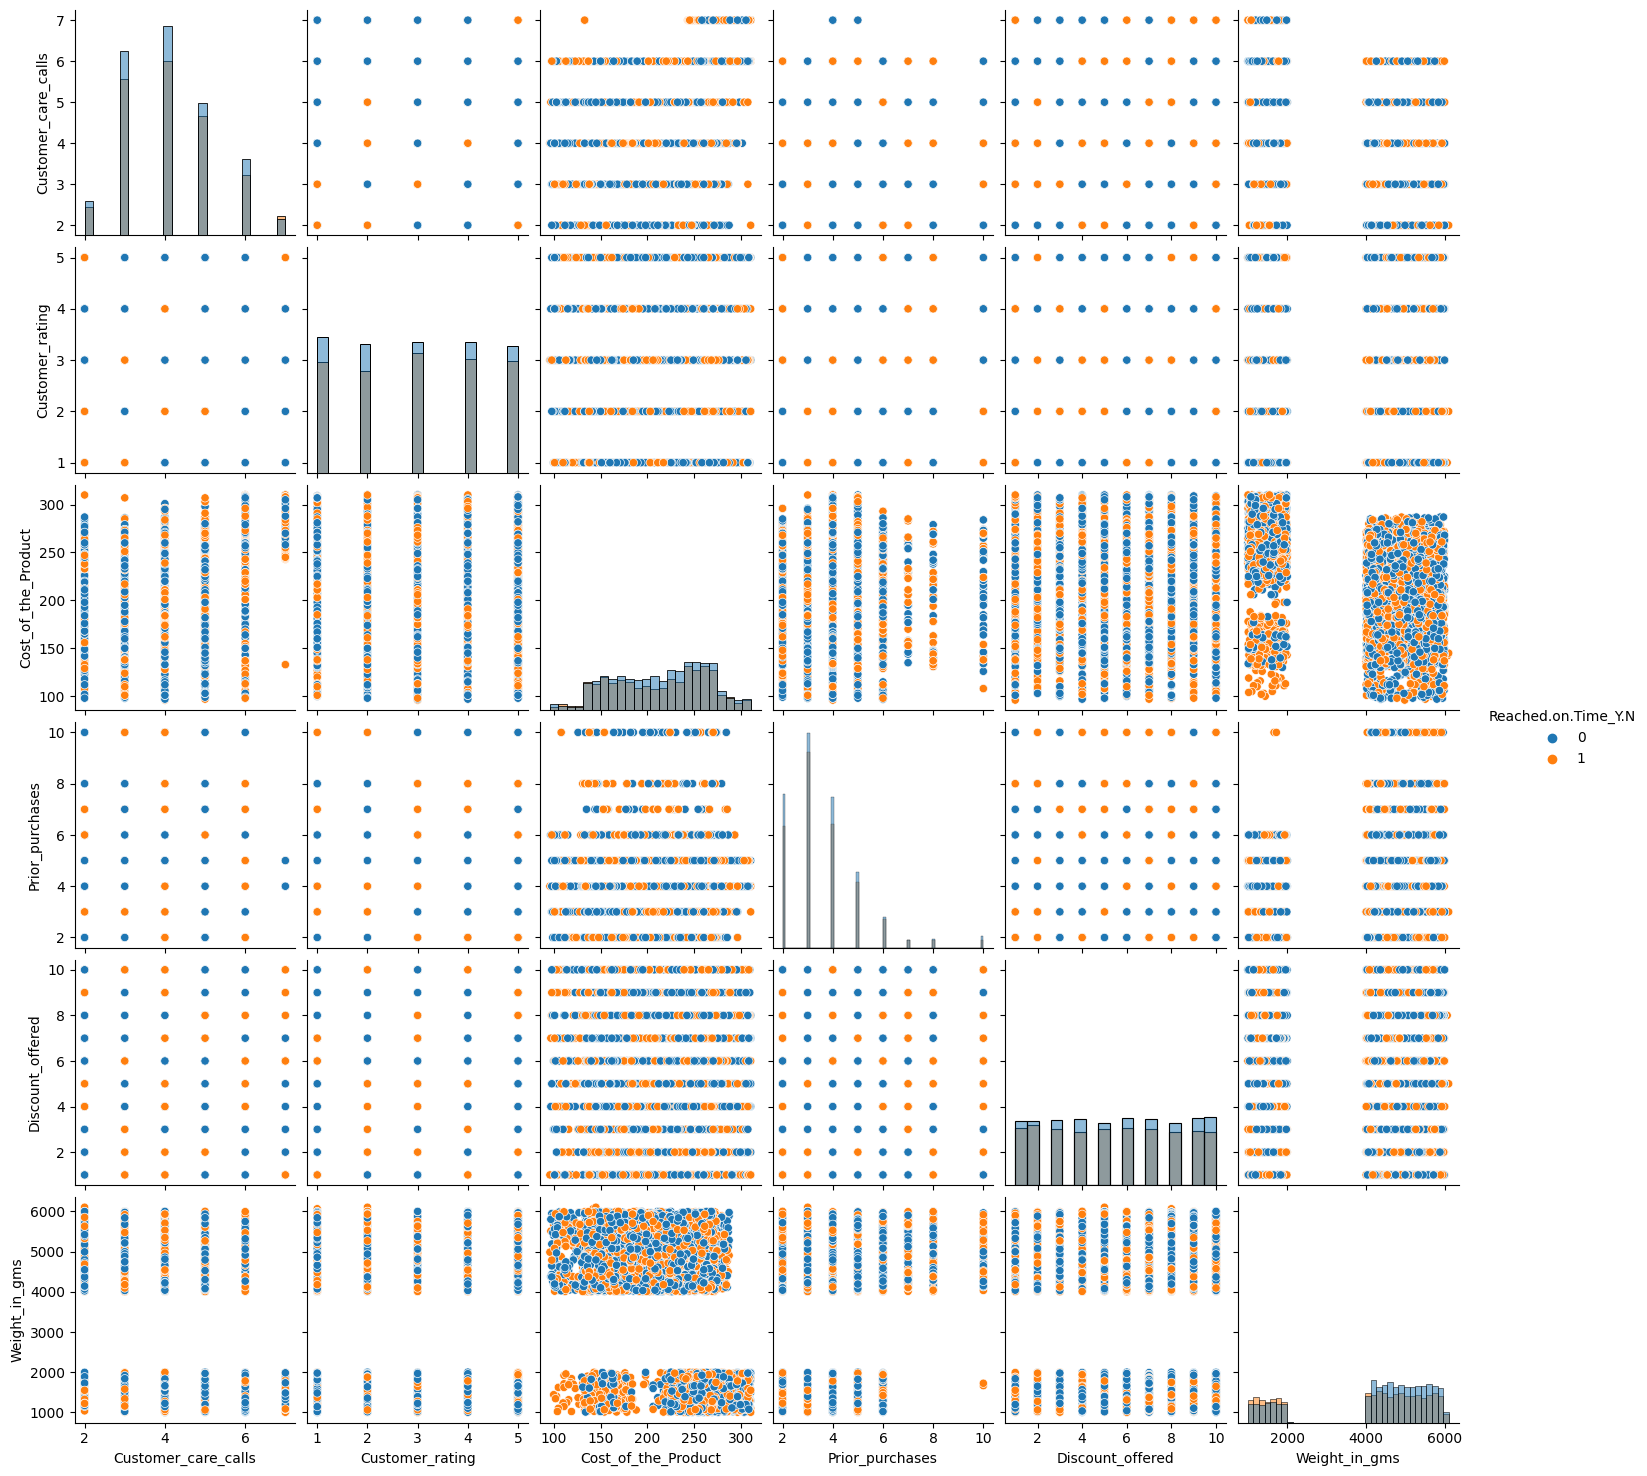

In [37]:
sns.pairplot(datos.drop(columns=["ID"]), hue= "Reached.on.Time_Y.N", diag_kind="hist")
plt.savefig('distribucion_bivariada.png')
plt.show()

In [38]:
print(datos.shape[0], datostest.shape[0]) 

6083 2000


In [40]:
datos.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [41]:
X = datos.drop(columns=["Reached.on.Time_Y.N", "ID"])
Y = datos["Reached.on.Time_Y.N"]

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

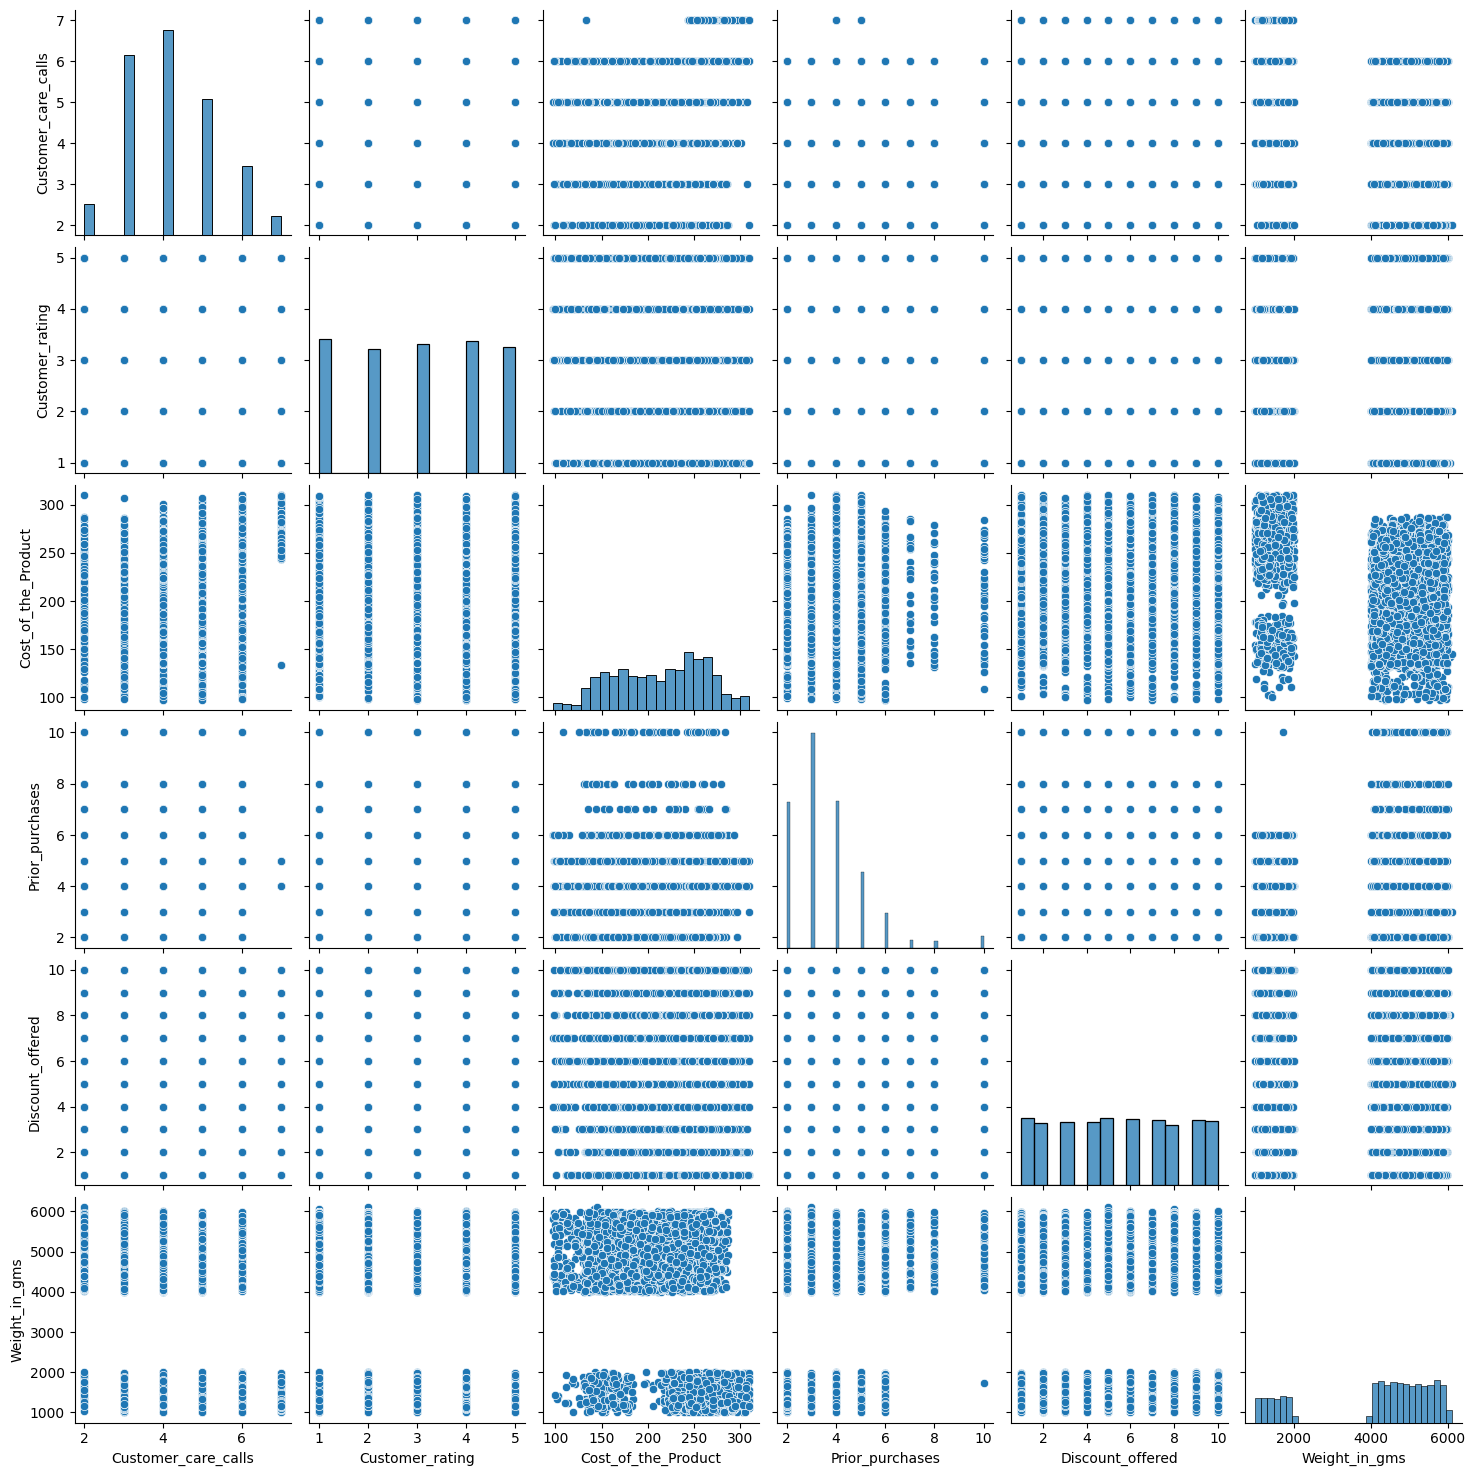

In [43]:
sns.pairplot(X_train, diag_kind="hist")
plt.show()

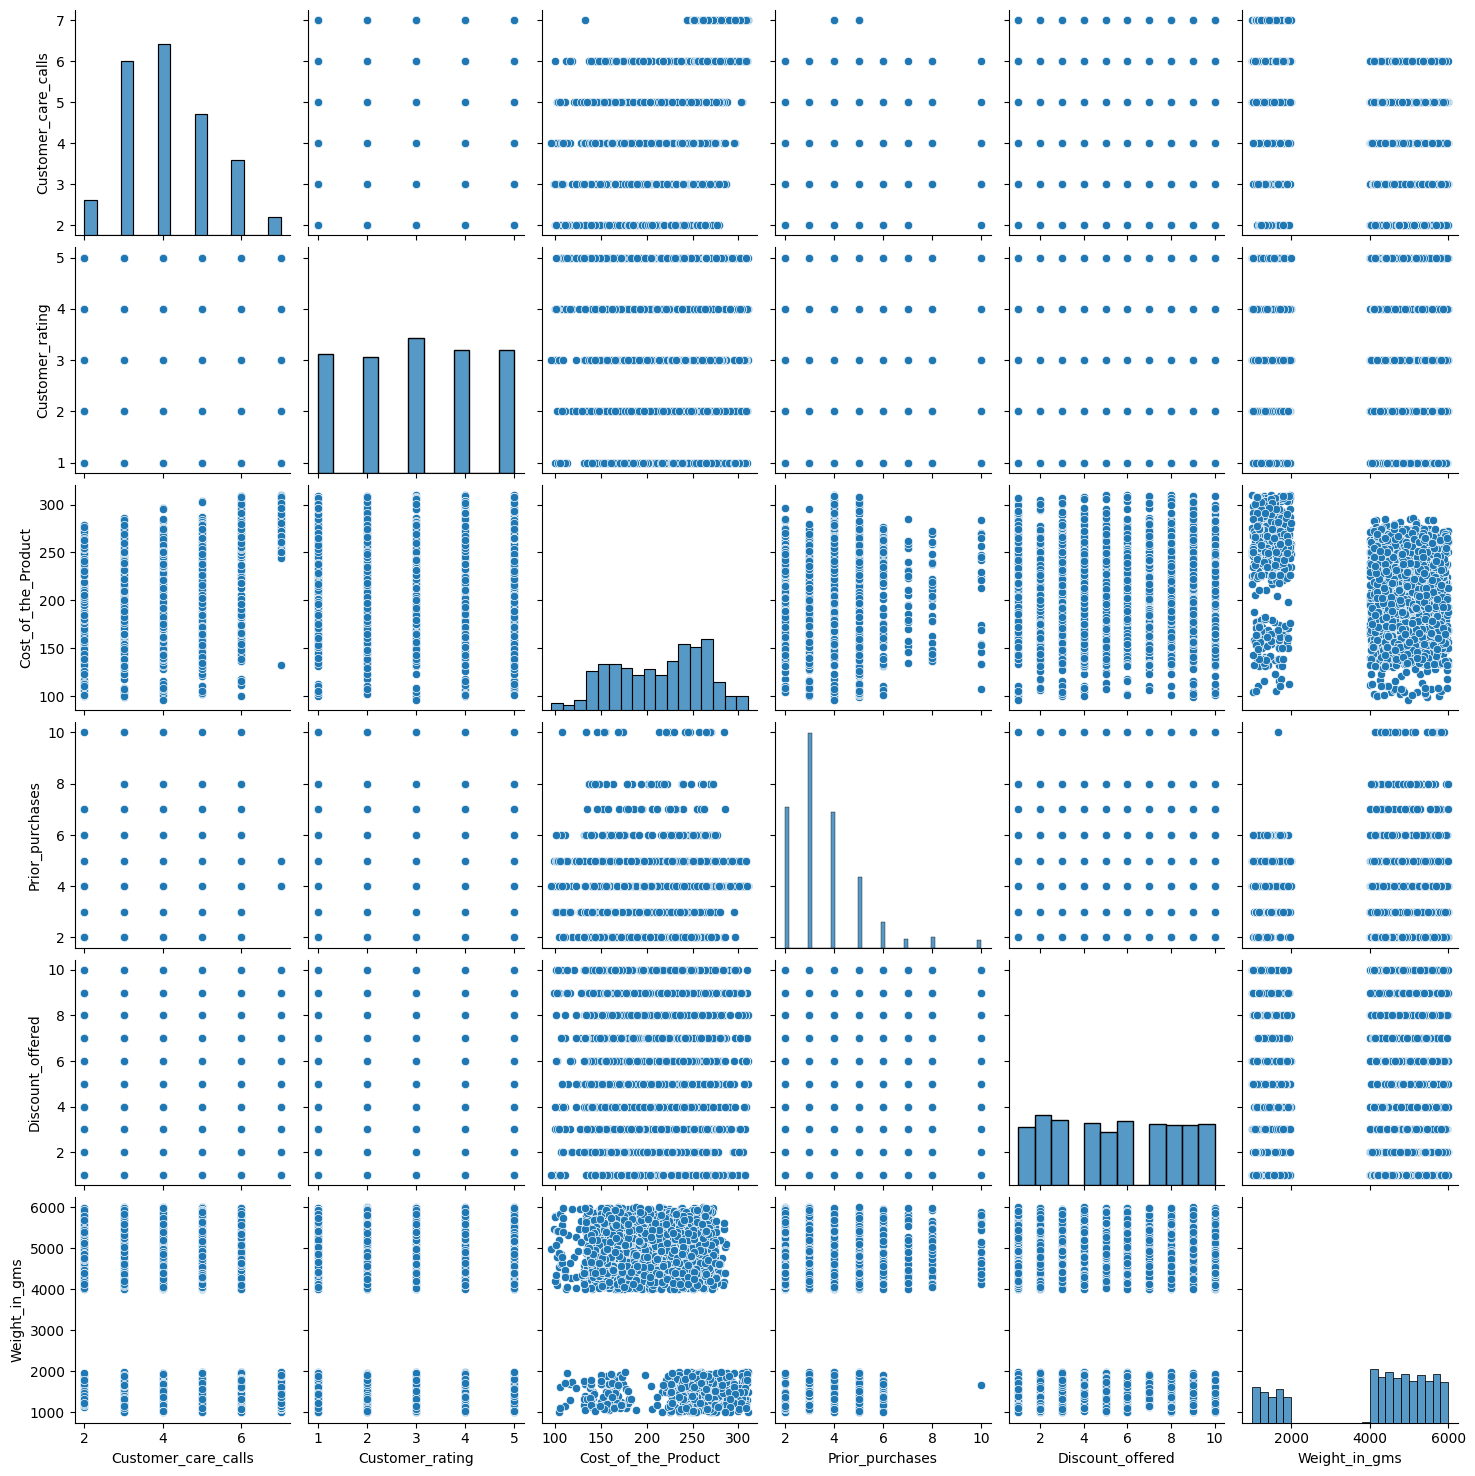

In [44]:
sns.pairplot(X_test, diag_kind="hist")
plt.show()

In [58]:


preprocesamiento_categorico = Pipeline(steps = [("onehot", OneHotEncoder())])

preprocesor = ColumnTransformer([
                                   (
                                    "categorico", preprocesamiento_categorico,
                                   [
                                    "Warehouse_block", "Gender", "Product_importance", "Mode_of_Shipment"                                     
                                    ])
                                ])

param_grid = {
    "MLP__hidden_layer_sizes": [(100,100,100,100,100)],
    "MLP__activation": ["identity", "logistic", "tanh", "relu"],
    "pca__n_components": [1,2,3,4,5,6,7,8],
    "pca__svd_solver": ["auto", "full", "arpack", "randomized"]
    
}

pipe = Pipeline(steps = [("Preprocesamiento", preprocesor), ("standarscale", StandardScaler()), ("pca", PCA()),
                         ("MLP", MLPClassifier(verbose=False,learning_rate="adaptive"))],verbose = False)
grid = GridSearchCV(pipe,param_grid=param_grid,verbose=3,cv=2)
grid

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocesamiento',
                                        ColumnTransformer(transformers=[('categorico',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Warehouse_block',
                                                                          'Gender',
                                                                          'Product_importance',
                                                                          'Mode_of_Shipment'])])),
                                       ('standarscale', StandardScaler()),
                                       ('pca', PCA()),
                                       ('MLP',
                                        MLPClassifier(learning_rate='adaptive'))]),
             param_grid={'MLP__activation': ['identity', 'logistic', 'tanh',
                                             'relu'],
                         'MLP__hidden_layer_sizes': [(100, 100, 100, 100, 100)],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
                         'pca__svd_solver': ['auto', 'full', 'arpack',
                                             'randomized']},
             verbose=3)

In [59]:
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 128 candidates, totalling 256 fits
[CV 1/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=auto;, score=0.542 total time=   5.8s
[CV 2/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=auto;, score=0.542 total time=   2.8s
[CV 1/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=full;, score=0.542 total time=   5.2s
[CV 2/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=full;, score=0.542 total time=   3.4s
[CV 1/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1, pca__svd_solver=arpack;, score=0.542 total time=   2.5s
[CV 2/2] END MLP__activation=identity, MLP__hidden_layer_sizes=(100, 100, 100, 100, 100), pca__n_components=1,

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocesamiento',
                                        ColumnTransformer(transformers=[('categorico',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Warehouse_block',
                                                                          'Gender',
                                                                          'Product_importance',
                                                                          'Mode_of_Shipment'])])),
                                       ('standarscale', StandardScaler()),
                                       ('pca', PCA()),
                                       ('MLP',
                                        MLPClassifier(learning_rate='adaptive'))]),
             param_grid={'MLP__activation': ['identity', 'logistic', 'tanh',
                                             'relu'],
                         'MLP__hidden_layer_sizes': [(100, 100, 100, 100, 100)],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
                         'pca__svd_solver': ['auto', 'full', 'arpack',
                                             'randomized']},
             verbose=3)

In [60]:
grid.best_estimator_

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('categorico',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Warehouse_block', 'Gender',
                                                   'Product_importance',
                                                   'Mode_of_Shipment'])])),
                ('standarscale', StandardScaler()),
                ('pca', PCA(n_components=5, svd_solver='randomized')),
                ('MLP',
                 MLPClassifier(activation='identity',
                               hidden_layer_sizes=(100, 100, 100, 100, 100),
                               learning_rate='adaptive'))])

In [61]:
grid.score(X_train, Y_train)

0.5423312883435583

In [62]:
grid.score(X_train, Y_train)

0.5423312883435583

In [64]:
print(classification_report(Y_train, grid.predict(X_train)))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      2210
           1       0.00      0.00      0.00      1865

    accuracy                           0.54      4075
   macro avg       0.27      0.50      0.35      4075
weighted avg       0.29      0.54      0.38      4075



/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
grid.score(X_test, Y_test)

In [65]:
print(classification_report(Y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1069
           1       0.00      0.00      0.00       939

    accuracy                           0.53      2008
   macro avg       0.27      0.50      0.35      2008
weighted avg       0.28      0.53      0.37      2008



/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harold/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#help(pipe)
pipe.named_steps

In [ ]:
cm = confusion_matrix(Y_train, grid.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
cm = confusion_matrix(Y_test, grid.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
X_salida = datostest.drop(columns=["ID"])

In [ ]:
Y_salida = grid.predict(X_salida)

In [ ]:
Y_salida

In [ ]:
salida = pd.DataFrame({"pred": Y_salida})

In [ ]:
salida.to_csv("haroldlaserna.csv", index = False)